In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

&nbsp;

$ay'' + by' + cy = 0$ 

&nbsp;

We assume this really is a 2nd order equation ($a \neq 0$). We can rewrite the equation:

$y'' = -\frac{b}{a}y' - \frac{c}{a}y$ 

&nbsp;

This 2nd order equation is equivalent to the following system of ODEs

$
\begin{cases}
z_1' = z_2 \\
z_2' = -\frac{b}{a}z_2 - \frac{c}{a}z_1
\end{cases}
~~~~~~~~~~~
\text{with}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix} = 
\begin{bmatrix}y \\ y' \end{bmatrix}
$

&nbsp;

Rewritten using Linear algebra:

$\frac{d}{dt}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix} = 
\begin{bmatrix} 0 & 1 \\ \frac{-c}{a} & \frac{-b}{a} \end{bmatrix}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix}$

In [194]:
# parameters
a = 1
b = 3
c = 2

In [195]:
# time array
t0 = 0
tf = 20
step = 0.1
t = np.arange(t0, tf, step)

In [196]:
# initial values
z1_ini = 10  # i.e. y(0) = 0
z2_ini = 0  # i.e. y'(0) = 0
z0 = np.array([z1_ini, z2_ini])

In [197]:
p = -b/a
q = -c/a

# using solve_ivp
def char_eq_bis(t, z):
    z1, z2 = z
    dz1dt = z2
    dz2dt = p*z2 + q*z1
    return [dz1dt, dz2dt]

z = solve_ivp(char_eq_bis, [t0, tf], z0, t_eval=t).y
position = z[0]
velocity = z[1]


# # Using odeint
# def char_eq(z, t):
#     z1, z2 = z
#     dz1dt = z2
#     dz2dt = p*z2 + q*z1
#     return [dz1dt, dz2dt]

# z_bis = odeint(char_eq, z0, t)
# position_bis = z_bis[:, 0]
# velocity_bis = z_bis[:, 1]


## Roots

$$ax^2+ bx+ c = 0$$


$$r_1, r_2=\frac{-b\pm \sqrt{b^2 -4ac}}{2a}$$

In [198]:
eq_roots = np.roots([a, b, c])
eq_roots

array([-2., -1.])

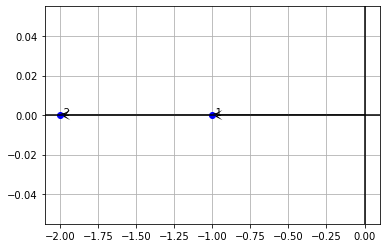

In [199]:
for r in eq_roots:
    x, y = r.real, r.imag
    label = '{:.3g}'.format(r)
    plt.plot(x, y, 'bo')
    plt.quiver(0, 0, x, y,
               angles='xy', scale_units='xy', scale=1,
               width=0.003, headwidth=10, headlength=10)
    plt.annotate(label, (x,y))
    
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## Position & Velocity

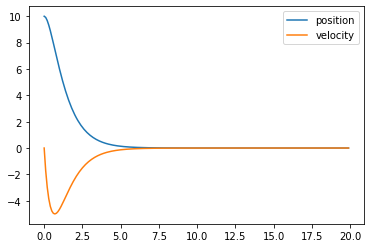

In [200]:
plt.plot(t, position, label='position')
plt.plot(t, velocity, label='velocity')
plt.legend(loc='best')
plt.show()

## Phase space

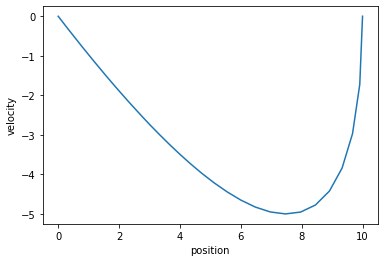

In [201]:
# phase space
plt.plot(position, velocity)
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()

## Matrix

In [202]:
from sympy import Matrix

In [229]:
mx = Matrix([[1,1,1,1], [2,1,4,3], [3,4,1,2]])
mx

Matrix([
[1, 1, 1, 1],
[2, 1, 4, 3],
[3, 4, 1, 2]])

In [230]:
mx.rref()[0]

Matrix([
[1, 0,  3,  2],
[0, 1, -2, -1],
[0, 0,  0,  0]])

In [231]:
for mat in mx.nullspace():
    print(mat)

Matrix([[-3], [2], [1], [0]])
Matrix([[-2], [1], [0], [1]])


In [242]:
mx.nullspace()[0]

Matrix([
[-3],
[ 2],
[ 1],
[ 0]])

In [236]:
np.array(mx).astype(np.float64)

array([[1., 1., 1., 1.],
       [2., 1., 4., 3.],
       [3., 4., 1., 2.]])

In [238]:
np.array(mx.nullspace()).astype(np.float64)

array([[[-3.],
        [ 2.],
        [ 1.],
        [ 0.]],

       [[-2.],
        [ 1.],
        [ 0.],
        [ 1.]]])

In [232]:
for mat in mx.columnspace():
    print(mat)

Matrix([[1], [2], [3]])
Matrix([[1], [1], [4]])


In [224]:
mx.eigenvals()

NonSquareMatrixError: Matrix([[1, 1, 1, 1], [1, 2, 3, 4], [4, 3, 2, 1]]) must be a square matrix.

# Logistic differential equations

&nbsp;

$$y' = ry(1 - \frac{y}{k})$$

